In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
from scipy.ndimage.filters import correlate, convolve

Import and cache mnist data from tensorflow lib

In [7]:
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)
"""
1

1

## Plotting

Make some helper functions

In [25]:
def plots(imgs, interp=False, titles=None):
    imgs = np.array(imgs) # convert to numpy array
    mn, mx = imgs.min(), imgs.max()
    f = plt.figure(figsize=(12, 24))
    for i in range(len(imgs)):
        sp = f.add_subplot(1, len(imgs), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(imgs[i], interpolation=None if interp else 'none')
    
def plot(img, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(img, interpolation=None if interp else 'none')

plt.gray()
plt.close()

Load data and test some plots

In [16]:
data = np.load("MNIST_data/train.npz")
images = data['images']
labels = data['labels']
n = len(images)
images.shape

(55000, 28, 28)

7


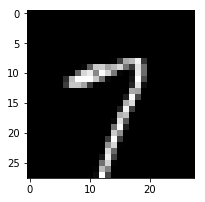

In [20]:
plot(images[8000])
print(labels[8000])

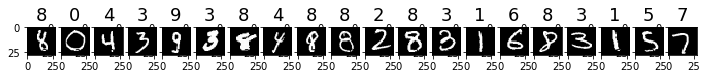

In [27]:
plots(images[2000:3000:50], titles=labels[2000:3000:50])

## Filters

Let's play with some filters

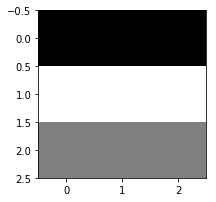

In [31]:
top = [[-1,-1,-1],
      [1,1,1],
      [0,0,0]]
plot(top)

In [34]:
zoom_range = (0,28)
def zoomimg(x1=0, x2=28, y1=0, y2=28):
    plot(images[0, y1:y2, x1:x2])
w = interactive(zoomimg, x1=zoom_range, x2=zoom_range, y1=zoom_range, y2=zoom_range)
w

A Jupyter Widget

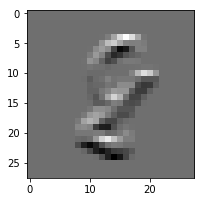

In [39]:
plot(correlate(images[200], top))

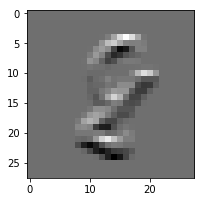

In [44]:
plot(convolve(images[200], np.rot90(top, 2)))